# Investor Reccomendation's system 

The goal of this project is to provide startup for venture capitalist to invest in 

In [1]:
from IPython.display import display, Math, Latex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import random
import os
import seaborn as sns

In [2]:
#read in csv's from kaggle 
acquisitions_df = pd.read_csv("acquisitions.csv")
degrees_df = pd.read_csv("degrees.csv")
funding_rounds_df = pd.read_csv("funding_rounds.csv")
funds_df = pd.read_csv("funds.csv")
investments_df = pd.read_csv("investments.csv")
ipos_df = pd.read_csv("ipos.csv")
milestones_df = pd.read_csv("milestones.csv")
objects_df = pd.read_csv("objects.csv")
offices_df = pd.read_csv("offices.csv")
people_df = pd.read_csv("people.csv")
relationship_df = pd.read_csv("relationships.csv")


/var/folders/q1/kqftk84d5sqg9fc5ymhjvyvh0000gn/T/ipykernel_44524/3827490828.py:9: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv("objects.csv")


# Data Cleaning: 

Merge and clean the data in order to build 3 DataFrames:

1) Startup DataFrame
 - each row contains details about a specfic startup 

2) Financial Organization DataFrame
 - each row contains details about a specfic investment firm

3) Startup Investor DataFrame
 - each row contains information about a specfic transaction between an investment firm and a startup 

In [3]:
#set max columns 
pd.set_option("display.max_columns", None)

In [4]:
#read in the objects df
objects_df.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401,54,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186,85,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107,34,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,0,0,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200,74,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [5]:
#Determine how many rows each entity has 
objects_df['entity_type'].value_counts()

Person          226708
Company         196553
Product          27738
FinancialOrg     11652
Name: entity_type, dtype: int64

In [6]:
#split the df's based on the entity type. 
startup_df = objects_df.copy()[objects_df['entity_type'] == 'Company']
person_df = objects_df.copy()[objects_df['entity_type'] == 'Person']
product_df = objects_df.copy()[objects_df['entity_type'] == 'Product']
financial_org_df = objects_df.copy()[objects_df['entity_type'] == 'FinancialOrg']

#### Startup DataFrame:

Each row in this dataframe will contain information about a specific startup

In [7]:
#view the startup df and drop the duplicates in the name column
startup_df.drop_duplicates(subset=['name'], inplace=True)
startup_df.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401,54,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186,85,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107,34,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,0,0,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200,74,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [8]:
# loop through each column to check the values of each column and how many null values. 
for column in startup_df.columns:
    
    print("Column:", column)
    
    # Print value counts for the column
    print(startup_df[column].value_counts())
    
    # Print count of null values for the column
    print("Null values:", startup_df[column].isnull().sum())
    
    print("\n" + "="*50 + "\n")


Column: id
c:1         1
c:275332    1
c:275322    1
c:275323    1
c:275324    1
           ..
c:209416    1
c:209417    1
c:209418    1
c:209419    1
c:9998      1
Name: id, Length: 196506, dtype: int64
Null values: 0


Column: entity_type
Company    196506
Name: entity_type, dtype: int64
Null values: 0


Column: entity_id
1         1
275332    1
275322    1
275323    1
275324    1
         ..
209416    1
209417    1
209418    1
209419    1
9998      1
Name: entity_id, Length: 196506, dtype: int64
Null values: 0


Column: parent_id
Series([], Name: parent_id, dtype: int64)
Null values: 196506


Column: name
Wetpaint                                      1
Sunray Hot Tubs and Spas                      1
Artemis Business Solutions                    1
Breakout Interactive                          1
BYO Responsible Water Solutions               1
                                             ..
Mimosa Systems - acquired by Iron Mountain    1
LexiQuest                                     1


unknown           109824
SF Bay             10172
New York            5174
London              4064
Los Angeles         4057
                   ...  
Johns Island           1
Hersham                1
Harwell                1
Puerto Andratx         1
D.I.Khan               1
Name: region, Length: 5865, dtype: int64
Null values: 0


Column: first_investment_at
2009-01-01    33
2012-01-01    30
2010-01-01    29
2011-01-01    27
2008-01-01    24
              ..
2009-01-21     1
2008-03-01     1
2009-04-14     1
2008-11-12     1
2010-12-08     1
Name: first_investment_at, Length: 1197, dtype: int64
Null values: 193924


Column: last_investment_at
2012-01-01    33
2009-01-01    27
2010-01-01    24
2008-01-01    22
2012-03-01    22
              ..
2012-03-30     1
2008-10-10     1
2008-09-01     1
2006-10-31     1
2010-12-08     1
Name: last_investment_at, Length: 1105, dtype: int64
Null values: 193924


Column: investment_rounds
0      193916
1        1956
2         299
3         125
4    

In [9]:
#list of colums to drop 
columns_to_drop = ['parent_id', 'normalized_name', 'permalink', 'domain', 'homepage_url', 'twitter_username',
                  'logo_url', 'logo_width', 'logo_height', 'short_description', 'overview', 'state_code', 'first_investment_at',
                  'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at',
                  'created_by', 'created_at', 'updated_at','entity_id','investment_rounds', 'invested_companies', 'description',
                  'tag_list', 'founded_at', 'entity_type']

columns_to_drop = [col for col in columns_to_drop if col in startup_df.columns]

#drop irrelevant columns 
startup_df.drop(columns=columns_to_drop, inplace=True)


In [10]:
#covert closed_at to a boolean value and rename it is_closed
startup_df['closed_at'] = startup_df['closed_at'].notnull()
startup_df.rename(columns={'closed_at': 'is_closed'}, inplace=True)

#fill null values in country_code, city, and region with the value 'unknown'
startup_df['country_code'].fillna('unknown', inplace=True)
startup_df['city'].fillna('unknown', inplace=True)
startup_df['region'].fillna('unknown', inplace=True)

#rename the startup_id column to id 
startup_df.rename(columns={'id': 'startup_id'}, inplace=True)

#fill the null values in category_code with the value 'other'
startup_df['category_code'].fillna("other", inplace=True)

In [11]:
#read in the startup df 
startup_df.head()

,startup_id,name,category_code,status,is_closed,country_code,city,region,funding_rounds,funding_total_usd,milestones,relationships
0,c:1,Wetpaint,web,operating,False,USA,Seattle,Seattle,3,39750000.0,5,17
1,c:10,Flektor,games_video,acquired,False,USA,Culver City,Los Angeles,0,0.0,0,6
2,c:100,There,games_video,acquired,False,USA,San Mateo,SF Bay,0,0.0,4,12
3,c:10000,MYWEBBO,network_hosting,operating,False,unknown,unknown,unknown,0,0.0,0,0
4,c:10001,THE Movie Streamer,games_video,operating,False,unknown,unknown,unknown,0,0.0,0,0


In [12]:
#view aquistion df 
acquisitions_df.head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [13]:
#use the acquisitions_df to create a is_acquired column in the startup_df
startup_df['is_acquired'] = startup_df['startup_id'].isin(acquisitions_df['acquired_object_id'])
startup_df.head()

,startup_id,name,category_code,status,is_closed,country_code,city,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired
0,c:1,Wetpaint,web,operating,False,USA,Seattle,Seattle,3,39750000.0,5,17,False
1,c:10,Flektor,games_video,acquired,False,USA,Culver City,Los Angeles,0,0.0,0,6,True
2,c:100,There,games_video,acquired,False,USA,San Mateo,SF Bay,0,0.0,4,12,True
3,c:10000,MYWEBBO,network_hosting,operating,False,unknown,unknown,unknown,0,0.0,0,0,False
4,c:10001,THE Movie Streamer,games_video,operating,False,unknown,unknown,unknown,0,0.0,0,0,False


In [14]:
#clean the degree_type column 
degrees_df['degree_type'] = degrees_df['degree_type'].str.replace('.', '').str.upper()

/var/folders/q1/kqftk84d5sqg9fc5ymhjvyvh0000gn/T/ipykernel_44524/4188460322.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  degrees_df['degree_type'] = degrees_df['degree_type'].str.replace('.', '').str.upper()


In [15]:
#view the degrees_df
degrees_df.head()

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09


In [16]:
#view the relationship_df
relationship_df.head()

,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41


In [17]:
#rank the different type of education 
degree_ranks = {
    'PhD': 5,
    'MBA': 4,
    'MS': 3,
    'JD':3,
    'Other': 2
}

In [18]:
# Merge the relationship_df and degrees_df based on the 'person_object_id' and 'object_id' columns.
merged_df = relationship_df.merge(degrees_df, left_on='person_object_id', right_on='object_id', how='left')

#create a degree_rank column based on the ranks asigned above
merged_df['degree_rank'] = merged_df['degree_type'].map(degree_ranks).fillna(degree_ranks['Other'])

#sum the degree_rank for each startup 
company_degree_rank = merged_df.groupby('relationship_object_id')['degree_rank'].sum()

#create employee_education_rank colum 
startup_df['employee_education_rank'] = startup_df['startup_id'].map(company_degree_rank).fillna(0)

#view the startup_df
startup_df.head()

,startup_id,name,category_code,status,is_closed,country_code,city,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,employee_education_rank
0,c:1,Wetpaint,web,operating,False,USA,Seattle,Seattle,3,39750000.0,5,17,False,69.0
1,c:10,Flektor,games_video,acquired,False,USA,Culver City,Los Angeles,0,0.0,0,6,True,15.0
2,c:100,There,games_video,acquired,False,USA,San Mateo,SF Bay,0,0.0,4,12,True,50.0
3,c:10000,MYWEBBO,network_hosting,operating,False,unknown,unknown,unknown,0,0.0,0,0,False,0.0
4,c:10001,THE Movie Streamer,games_video,operating,False,unknown,unknown,unknown,0,0.0,0,0,False,0.0


In [19]:
#save the startup_df to a csv file
startup_df.to_csv('startup_data.csv', index=False)
cleaned_startup_df = pd.read_csv("startup_data.csv")
cleaned_startup_df.head()

,startup_id,name,category_code,status,is_closed,country_code,city,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,employee_education_rank
0,c:1,Wetpaint,web,operating,False,USA,Seattle,Seattle,3,39750000.0,5,17,False,69.0
1,c:10,Flektor,games_video,acquired,False,USA,Culver City,Los Angeles,0,0.0,0,6,True,15.0
2,c:100,There,games_video,acquired,False,USA,San Mateo,SF Bay,0,0.0,4,12,True,50.0
3,c:10000,MYWEBBO,network_hosting,operating,False,unknown,unknown,unknown,0,0.0,0,0,False,0.0
4,c:10001,THE Movie Streamer,games_video,operating,False,unknown,unknown,unknown,0,0.0,0,0,False,0.0


#### Financial Organization DataFrame:

Each row in this dataframe will contain information about a venture capitalist


In [20]:
#read in the financial_org_df
financial_org_df.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
196553,f:1,FinancialOrg,1,NaN,Greylock Partners,greylock,/financial-organization/greylock,NaN,operating,1965-01-01,NaN,greylock.com,http://www.greylock.com,greylockvc,http://s3.amazonaws.com/crunchbase_prod_assets...,2719,647,NaN,VC firm,Greylock partners with entrepreneurs to help t...,"venture-capital, growth-capital, startup, entr...",USA,CA,Menlo Park,SF Bay,2000-03-01,2013-12-05,307,196,NaN,NaN,0,0.0,NaN,NaN,0,71,initial-importer,2007-05-25 20:18:23,2012-12-27 00:42:24
196554,f:10,FinancialOrg,10,NaN,Mission Ventures,mission ventures,/financial-organization/mission-ventures,NaN,operating,1996-01-01,NaN,missionventures.com,http://www.missionventures.com/index.php,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,296,91,NaN,Venture Capital,Mission Ventures helps build successful enterp...,NaN,USA,CA,San Diego,San Diego,2004-10-26,2013-11-22,58,33,NaN,NaN,0,0.0,NaN,NaN,0,11,initial-importer,2007-06-05 05:24:58,2013-10-10 22:06:31
196555,f:100,FinancialOrg,100,NaN,"Kapor Enterprises, Inc.",kapor enterprises,/financial-organization/kapor-enterprises-inc,NaN,operating,NaN,NaN,kei.com,http://www.kei.com,NaN,NaN,0,0,NaN,NaN,Kapor Enterprises Inc. (KEI) provides services...,NaN,USA,NaN,NaN,TBD,2004-10-28,2006-03-01,2,1,NaN,NaN,0,0.0,NaN,NaN,0,1,initial-importer,2007-07-12 09:42:21,2008-11-21 05:41:53
196556,f:1000,FinancialOrg,1000,NaN,Speed Ventures,speed ventures,/financial-organization/speed-ventures,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,"Speed Ventures was acquired on May 27, 2002 by...",NaN,NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,2002-05-27,2002-05-27,1,1,jason,2008-04-13 23:52:27,2008-12-10 09:37:18
196557,f:10000,FinancialOrg,10000,NaN,3x5 Special Opportunity Partners,3x5 special opportunity,/financial-organization/3x5-special-opportunit...,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,2012-10-23,2013-10-29,4,4,NaN,NaN,0,0.0,NaN,NaN,0,0,timircha,2012-10-26 03:16:38,2012-10-26 03:16:38


In [21]:
#list of columns to drop 
columns_to_drop = ['parent_id', 'normalized_name', 'permalink', 'category_code', 'founded_at', 'closed_at', 
                  'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
                  'short_description', 'description', 'tag_list', 'state_code', 'first_funding_at', 
                  'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
                  'created_by', 'created_at', 'updated_at', 'entity_id', 'entity_type', 'overview', 'status']

#drop irrelevant columns 
columns_to_drop = [col for col in columns_to_drop if col in financial_org_df.columns]
financial_org_df.drop(columns=columns_to_drop, inplace=True)


In [22]:
#fill the null values with 'unkown' value in country_code, city, and region 
financial_org_df['country_code'].fillna('unknown', inplace=True)
financial_org_df['city'].fillna('unknown', inplace=True)
financial_org_df['region'].fillna('unknown', inplace=True)

#rename the finOrg_id column to id
financial_org_df.rename(columns={'id': 'finOrg_id'}, inplace=True)

#replace the 'TBD' value with 'Unkown'
financial_org_df.replace('TBD', 'Unknown', inplace=True)

#convert first_investment_at and last_investment_at to datetime 
financial_org_df['first_investment_at'] = pd.to_datetime(financial_org_df['first_investment_at'])
financial_org_df['last_investment_at'] = pd.to_datetime(financial_org_df['last_investment_at'])

#create a years_invested column representing the number of years the financial org has been investing for
financial_org_df['years_invested'] = round((financial_org_df['last_investment_at'] - financial_org_df['first_investment_at']).dt.days / 365.25, 2)

#change the name of f:14844 because in a dataframe there is another finOrg id with the same name as f:14844
financial_org_df.loc[financial_org_df['finOrg_id'] == 'f:14844', 'name'] = 'KfW Bankengruppe II'


In [23]:
#save the financial_org_df to a csv file
financial_org_df.to_csv('financial_org_data.csv', index=False)
cleaned_finOrg_df = pd.read_csv('financial_org_data.csv')
#view the cleaned_finOrg_df
cleaned_finOrg_df.head()

,finOrg_id,name,country_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,milestones,relationships,years_invested
0,f:1,Greylock Partners,USA,Menlo Park,SF Bay,2000-03-01,2013-12-05,307,196,0,71,13.76
1,f:10,Mission Ventures,USA,San Diego,San Diego,2004-10-26,2013-11-22,58,33,0,11,9.07
2,f:100,"Kapor Enterprises, Inc.",USA,unknown,Unknown,2004-10-28,2006-03-01,2,1,0,1,1.34
3,f:1000,Speed Ventures,unknown,unknown,unknown,NaN,NaN,0,0,1,1,NaN
4,f:10000,3x5 Special Opportunity Partners,unknown,unknown,unknown,2012-10-23,2013-10-29,4,4,0,0,1.02


#### Startup Investor DataFrame:

Each row in this dataframe will contain information about an investment transaction between the investor and the startup

In [24]:
#View investments_df which contains data on the various different investments made by venture capitalists.
investments_df.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [25]:
#list of columns to drop 
columns_to_drop = ['id', 'created_at', 'updated_at']

#drop irrelevant columns 
columns_to_drop = [col for col in columns_to_drop if col in investments_df.columns]
investments_df.drop(columns=columns_to_drop, inplace=True)

In [26]:
#Keep only investors that are financial organizations and not people or other companies 
investments_df = investments_df[investments_df['investor_object_id'].str.startswith('f:')]

#rename the investor_object_id to finOrg_id
investments_df.rename(columns={'investor_object_id': 'finOrg_id'}, inplace=True)

#rename the funded_object_id to startup_id
investments_df.rename(columns={'funded_object_id': 'startup_id'}, inplace=True)

In [27]:
#view the investments_df
investments_df.head()

,funding_round_id,startup_id,finOrg_id
0,1,c:4,f:1
1,1,c:4,f:2
2,3,c:5,f:4
3,4,c:5,f:1
4,4,c:5,f:5


In [28]:
#view the funding_round df 
funding_rounds_df.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,0.0,USD,0.0,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,115000000.0,USD,0.0,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,525000000.0,USD,0.0,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [29]:
#merge investments_df and funding_rounds_df
investments_df = investments_df.merge(funding_rounds_df[['funding_round_id', 'funded_at', 'funding_round_type', 'funding_round_code', 'raised_amount', 'raised_currency_code','is_first_round', 'is_last_round']], 
                                  on='funding_round_id', 
                                  how='left')

#filter the df with columns where the raised_amount is not 0
investments_df = investments_df[investments_df['raised_amount'] != 0]


In [30]:
#drop null values
investments_df = investments_df.dropna()

# view the investments_df
investments_df.head()

,funding_round_id,startup_id,finOrg_id,funded_at,funding_round_type,funding_round_code,raised_amount,raised_currency_code,is_first_round,is_last_round
0,1,c:4,f:1,2006-12-01,series-b,b,8500000.0,USD,0,0
1,1,c:4,f:2,2006-12-01,series-b,b,8500000.0,USD,0,0
2,3,c:5,f:4,2005-05-01,series-a,a,12700000.0,USD,0,0
3,4,c:5,f:1,2006-04-01,series-b,b,27500000.0,USD,0,0
4,4,c:5,f:5,2006-04-01,series-b,b,27500000.0,USD,0,0


In [31]:
#Loop through each column checking the values in each column and check if there are null values

for column in investments_df.columns:
    # Print the column name
    print("Column:", column)
    
    # Print value counts for the column
    print(investments_df[column].value_counts())
    
    # Print the null values for the column
    print("Null values:", investments_df[column].isnull().sum())
    
    print("\n" + "="*50 + "\n") 

#There is some null values in funded_at 

Column: funding_round_id
9432     16
14627    16
18627    16
16549    15
9422     14
         ..
29263     1
11744     1
29267     1
29268     1
57948     1
Name: funding_round_id, Length: 24495, dtype: int64
Null values: 0


Column: startup_id
c:32499     54
c:16284     45
c:36591     42
c:169876    42
c:16192     37
            ..
c:23248      1
c:83501      1
c:50645      1
c:83445      1
c:211890     1
Name: startup_id, Length: 15775, dtype: int64
Null values: 0


Column: finOrg_id
f:316     507
f:17      472
f:367     464
f:4       458
f:41      456
         ... 
f:5824      1
f:5825      1
f:5828      1
f:5829      1
f:2248      1
Name: finOrg_id, Length: 7217, dtype: int64
Null values: 0


Column: funded_at
2008-01-01    311
2012-01-01    288
2007-01-01    275
2006-01-01    217
2012-04-01    213
             ... 
1994-07-09      1
2007-08-25      1
2006-07-29      1
2013-03-17      1
2001-05-31      1
Name: funded_at, Length: 3073, dtype: int64
Null values: 0


Column: funding_r

In [32]:
#save investments_df to a csv file
investments_df.to_csv('investor_startup.csv', index=False)
cleaned_investor_startup_df = pd.read_csv('investor_startup.csv')

#view the cleaned_investor_startup_df
cleaned_investor_startup_df.head()

,funding_round_id,startup_id,finOrg_id,funded_at,funding_round_type,funding_round_code,raised_amount,raised_currency_code,is_first_round,is_last_round
0,1,c:4,f:1,2006-12-01,series-b,b,8500000.0,USD,0,0
1,1,c:4,f:2,2006-12-01,series-b,b,8500000.0,USD,0,0
2,3,c:5,f:4,2005-05-01,series-a,a,12700000.0,USD,0,0
3,4,c:5,f:1,2006-04-01,series-b,b,27500000.0,USD,0,0
4,4,c:5,f:5,2006-04-01,series-b,b,27500000.0,USD,0,0


# Get Data Prepared for Machine Learning 

Once the three dataframes are created, these dataframes are furthered be cleaned for machine learning 

#### Startup DataFrame

In [33]:
#view the startup df 
cleaned_startup_df.head()

,startup_id,name,category_code,status,is_closed,country_code,city,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,employee_education_rank
0,c:1,Wetpaint,web,operating,False,USA,Seattle,Seattle,3,39750000.0,5,17,False,69.0
1,c:10,Flektor,games_video,acquired,False,USA,Culver City,Los Angeles,0,0.0,0,6,True,15.0
2,c:100,There,games_video,acquired,False,USA,San Mateo,SF Bay,0,0.0,4,12,True,50.0
3,c:10000,MYWEBBO,network_hosting,operating,False,unknown,unknown,unknown,0,0.0,0,0,False,0.0
4,c:10001,THE Movie Streamer,games_video,operating,False,unknown,unknown,unknown,0,0.0,0,0,False,0.0


In [34]:
#convert is_closed and is_acquired to a boolean value 0 or 1
cleaned_startup_df['is_closed'] = cleaned_startup_df['is_closed'].astype(int)
cleaned_startup_df['is_acquired'] = cleaned_startup_df['is_acquired'].astype(int)

In [35]:
#drop the city column - the model will look at country and region, thuse city is not needed
cleaned_startup_df = cleaned_startup_df.drop(columns=['city'])

In [36]:
#remove the 'c:' from the startup_id and convert it to a numeric dtype
cleaned_startup_df['startup_id'] = cleaned_startup_df['startup_id'].str.replace('c:', '')
cleaned_startup_df = cleaned_startup_df.apply(pd.to_numeric, errors="ignore")

In [37]:
#rename the employee_education_rank to company_education_score
cleaned_startup_df.rename(columns={'employee_education_rank': 'company_education_score'}, inplace=True)

In [38]:
#view the cleaned_startup_df
cleaned_startup_df.head()

,startup_id,name,category_code,status,is_closed,country_code,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,company_education_score
0,1,Wetpaint,web,operating,0,USA,Seattle,3,39750000.0,5,17,0,69.0
1,10,Flektor,games_video,acquired,0,USA,Los Angeles,0,0.0,0,6,1,15.0
2,100,There,games_video,acquired,0,USA,SF Bay,0,0.0,4,12,1,50.0
3,10000,MYWEBBO,network_hosting,operating,0,unknown,unknown,0,0.0,0,0,0,0.0
4,10001,THE Movie Streamer,games_video,operating,0,unknown,unknown,0,0.0,0,0,0,0.0


In [39]:
#view the dtypes of the cleaned_startup_df
cleaned_startup_df.dtypes

startup_id                   int64
name                        object
category_code               object
status                      object
is_closed                    int64
country_code                object
region                      object
funding_rounds               int64
funding_total_usd          float64
milestones                   int64
relationships                int64
is_acquired                  int64
company_education_score    float64
dtype: object

#### Financial Organization DataFrame

In [40]:
#view the cleaned_finOrg_df
cleaned_finOrg_df.head()

,finOrg_id,name,country_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,milestones,relationships,years_invested
0,f:1,Greylock Partners,USA,Menlo Park,SF Bay,2000-03-01,2013-12-05,307,196,0,71,13.76
1,f:10,Mission Ventures,USA,San Diego,San Diego,2004-10-26,2013-11-22,58,33,0,11,9.07
2,f:100,"Kapor Enterprises, Inc.",USA,unknown,Unknown,2004-10-28,2006-03-01,2,1,0,1,1.34
3,f:1000,Speed Ventures,unknown,unknown,unknown,NaN,NaN,0,0,1,1,NaN
4,f:10000,3x5 Special Opportunity Partners,unknown,unknown,unknown,2012-10-23,2013-10-29,4,4,0,0,1.02


In [41]:
#checks if the null names are in the cleaned_investor_startup_df
unique_finOrg_ids = cleaned_investor_startup_df['finOrg_id'].unique()

# Filters cleaned_finOrg_df to get rows with null values in 'name' column
null_name_rows = cleaned_finOrg_df[cleaned_finOrg_df['name'].isnull()]

# Check if the finOrg_id values with null names are present in the unique_finOrg_ids
matching_ids = null_name_rows['is_in_investor_startup_df'] = null_name_rows['finOrg_id'].isin(unique_finOrg_ids)

print(matching_ids)

2671     False
11382    False
Name: finOrg_id, dtype: bool


/var/folders/q1/kqftk84d5sqg9fc5ymhjvyvh0000gn/T/ipykernel_44524/3505935603.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_ids = null_name_rows['is_in_investor_startup_df'] = null_name_rows['finOrg_id'].isin(unique_finOrg_ids)


In [42]:
#drop the name column in cleaned_finOrg_df
cleaned_finOrg_df.dropna(subset=['name'], inplace=True)

In [43]:
# Get the list of finOrg_ids with null first_investment_at values
null_first_investment_ids = cleaned_finOrg_df[cleaned_finOrg_df['first_investment_at'].isnull()]['finOrg_id'].tolist()

# Filter cleaned_investor_startup_df to find matching finOrg_ids
matching_startup_ids = cleaned_investor_startup_df[cleaned_investor_startup_df['finOrg_id'].isin(null_first_investment_ids)]['startup_id'].tolist()

print("Matching startup_ids:", matching_startup_ids)


Matching startup_ids: []


In [44]:
#drop null values in 'first_investment_at', 'last_investment_at', 'years_invested'
cleaned_finOrg_df.dropna(subset=['first_investment_at', 'last_investment_at', 'years_invested'], inplace=True)

In [45]:
# drop 'first_investment_at', 'last_investment_at', 'city' columns 
cleaned_finOrg_df.drop(columns=['first_investment_at', 'last_investment_at', 'city'], inplace=True)

In [46]:
#remove the 'f:'from finOrg_id and convert the this column to a numeric dtype
cleaned_finOrg_df['finOrg_id'] = cleaned_finOrg_df['finOrg_id'].str.replace('f:', '')
cleaned_finOrg_df = cleaned_finOrg_df.apply(pd.to_numeric, errors="ignore")

In [47]:
#rename the 'Unknown' value to 'unknown' 
cleaned_finOrg_df['region'] = cleaned_finOrg_df['region'].replace('Unknown', 'unknown')

In [48]:
#view the cleaned_finOrg_df
cleaned_finOrg_df.head()

,finOrg_id,name,country_code,region,investment_rounds,invested_companies,milestones,relationships,years_invested
0,1,Greylock Partners,USA,SF Bay,307,196,0,71,13.76
1,10,Mission Ventures,USA,San Diego,58,33,0,11,9.07
2,100,"Kapor Enterprises, Inc.",USA,unknown,2,1,0,1,1.34
4,10000,3x5 Special Opportunity Partners,unknown,unknown,4,4,0,0,1.02
5,10001,Salem Partners,USA,Los Angeles,1,1,0,3,0.00


In [49]:
#view the cleaned_finOrg_df dtypes
cleaned_finOrg_df.dtypes

finOrg_id               int64
name                   object
country_code           object
region                 object
investment_rounds       int64
invested_companies      int64
milestones              int64
relationships           int64
years_invested        float64
dtype: object

####  Startup Investor DataFrame


In [50]:
#view the cleaned_investor_startup_df
cleaned_investor_startup_df.head()

,funding_round_id,startup_id,finOrg_id,funded_at,funding_round_type,funding_round_code,raised_amount,raised_currency_code,is_first_round,is_last_round
0,1,c:4,f:1,2006-12-01,series-b,b,8500000.0,USD,0,0
1,1,c:4,f:2,2006-12-01,series-b,b,8500000.0,USD,0,0
2,3,c:5,f:4,2005-05-01,series-a,a,12700000.0,USD,0,0
3,4,c:5,f:1,2006-04-01,series-b,b,27500000.0,USD,0,0
4,4,c:5,f:5,2006-04-01,series-b,b,27500000.0,USD,0,0


In [51]:
# drop the 'funding_round_id', 'raised_currency_code', 'funding_round_code' columns 
cleaned_investor_startup_df = cleaned_investor_startup_df.drop(columns=['funding_round_id', 'raised_currency_code', 'funding_round_code'])

# remove the "f:" from finOrg_id and "c:" from startup_id and convert it to numeric 
cleaned_investor_startup_df['finOrg_id'] = cleaned_investor_startup_df['finOrg_id'].str.replace('f:', '')
cleaned_investor_startup_df['startup_id'] = cleaned_investor_startup_df['startup_id'].str.replace('c:', '')
cleaned_investor_startup_df = cleaned_investor_startup_df.apply(pd.to_numeric, errors="ignore")

In [52]:
#convert the funded_at column to datetime
cleaned_investor_startup_df['funded_at'] = pd.to_datetime(cleaned_investor_startup_df['funded_at'])

In [53]:
#view the cleaned_investor_startup_df
cleaned_investor_startup_df.head()

,startup_id,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round
0,4,1,2006-12-01,series-b,8500000.0,0,0
1,4,2,2006-12-01,series-b,8500000.0,0,0
2,5,4,2005-05-01,series-a,12700000.0,0,0
3,5,1,2006-04-01,series-b,27500000.0,0,0
4,5,5,2006-04-01,series-b,27500000.0,0,0


In [54]:
#view the cleaned_investor_startup_df dtypes
cleaned_investor_startup_df.dtypes

startup_id                     int64
finOrg_id                      int64
funded_at             datetime64[ns]
funding_round_type            object
raised_amount                float64
is_first_round                 int64
is_last_round                  int64
dtype: object

In [55]:
#save cleaned_startup_df to csv
ml_startup_df = cleaned_startup_df.to_csv('ml_startup.csv', index=False)
ml_startup_df = pd.read_csv('ml_startup.csv')

In [56]:
#save the cleaned_finOrg_df to csv
ml_finOrg_df = cleaned_finOrg_df.to_csv('ml_finOrg.csv', index=False)
ml_finOrg_df = pd.read_csv('ml_finOrg.csv')

In [57]:
#save the cleaned_investor_startup_df to csv
ml_investor_startup_df = cleaned_investor_startup_df.to_csv('ml_investor_startup.csv', index=False)
ml_investor_startup_df = pd.read_csv('ml_investor_startup.csv')

# Building the Machine Learning Model 


#### 1) Create the user Input:

In [58]:
# Input the investment firm 
user_input = input("Enter the name of the investment firm: ")

Enter the name of the investment firm: Mission Ventures


In [59]:
selected_firm_info = None

# Check if the input matches a firm's name
if user_input in ml_finOrg_df['name'].values:
    selected_firm_info = ml_finOrg_df[ml_finOrg_df['name'] == user_input].iloc[0]
# If no match found, then inform them that there is no valid name or ID
else:
    print("Investment firm not found. Please provide a valid name or ID.")
    

In [60]:
if selected_firm_info is not None:
    print("Selected Investment Firm:")
    print("    Name:", selected_firm_info['name'])
    print("    ID:", selected_firm_info['finOrg_id'])


Selected Investment Firm:
    Name: Mission Ventures
    ID: 10


#### 2) Historical Investment Analysis:

This section extracts historical investment data for the selected investment firm and analyzies characteristics of the startups the investment firm has previously invested in.

In [61]:
# Get the ID of the selected investment firm
selected_firm_id = selected_firm_info['finOrg_id']  
print(f"Id of {selected_firm_info['name']}: {selected_firm_id}")

Id of Mission Ventures: 10


In [62]:
# Filter investment_startup_df to extract data for the selected investment firm
selected_firm_investments = ml_investor_startup_df[ml_investor_startup_df['finOrg_id'] == selected_firm_id]
selected_firm_investments.head()

,startup_id,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round
15,16,10,2007-06-01,series-b,40000000.0,0,1
19,16,10,2007-06-01,series-a,13500000.0,0,1
518,365,10,2007-12-19,series-a,18000000.0,0,0
565,416,10,2006-03-01,series-a,5000000.0,0,1
569,416,10,2007-10-01,series-b,16500000.0,0,0


In [63]:
# Merge selected_firm_investments with ml_startup_df to get startup characteristics
selected_firm_investments = selected_firm_investments.merge(ml_startup_df, on='startup_id', how='inner')
selected_firm_investments.head()

,startup_id,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round,name,category_code,status,is_closed,country_code,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,company_education_score
0,16,10,2007-06-01,series-b,40000000.0,0,1,Slacker,music,operating,0,USA,San Diego,6,73100000.0,4,16,0,49.0
1,16,10,2007-06-01,series-a,13500000.0,0,1,Slacker,music,operating,0,USA,San Diego,6,73100000.0,4,16,0,49.0
2,16,10,2009-01-29,venture,5000000.0,0,0,Slacker,music,operating,0,USA,San Diego,6,73100000.0,4,16,0,49.0
3,16,10,2009-05-14,series-c+,9600000.0,0,0,Slacker,music,operating,0,USA,San Diego,6,73100000.0,4,16,0,49.0
4,365,10,2007-12-19,series-a,18000000.0,0,0,Nirvanix,enterprise,closed,1,USA,San Diego,5,70000000.0,5,22,0,90.0


In [64]:
#Analyze the characteristics of startups that the investment firm has invested in

#calculate the average_funding_amount of the startup 
average_funding_amount = selected_firm_investments['raised_amount'].mean()

#calculate the most common category they invest in 
most_common_category = selected_firm_investments['category_code'].mode()[0]

#calculate the average milestones 
average_milestones = selected_firm_investments['milestones'].mean()

#Calculate the percentage of closed startups in the investment firm's portfolio
closed_startups_percentage = (selected_firm_investments['is_closed'].sum() / len(selected_firm_investments)) * 100

#Calculate the average number of relationships in startups that the investment firm invested in
average_relationships = selected_firm_investments['relationships'].mean()

#Calculate the average employee education score in startups that the investment firm invested in
average_education_score = selected_firm_investments['company_education_score'].mean()

#Most common region in the investment firm's portfolio
most_common_region = selected_firm_investments['region'].mode()[0]

#Most common country in the investment firm's portfolio
most_common_country = selected_firm_investments['country_code'].mode()[0]

#The amount they raised per category
category_avg_funding = selected_firm_investments.groupby('category_code')['raised_amount'].mean()

#Calculate the percentage of startups in the investment firm's portfolio that have been acquired
acquired_startups_percentage = (selected_firm_investments['is_acquired'].sum() / len(selected_firm_investments)) * 100

print(f"Average Funding Amount: ${round(average_funding_amount, 2)}")
print("Most Common Category:", most_common_category)
print("Average Milestones:", round(average_milestones, 2))
print(f"Closed Startups Percentage: {round(closed_startups_percentage, 2)}%")
print("Average Relationships:", round(average_relationships, 0))
print("Average Education Score:", round(average_education_score, 2))
print("Most Common Region:", most_common_region)
print("Most Common Country:", most_common_country)
print(f"Acquired Startups Percentage: {round(acquired_startups_percentage, 2)}%")

Average Funding Amount: $10001963.11
Most Common Category: enterprise
Average Milestones: 1.82
Closed Startups Percentage: 17.54%
Average Relationships: 10.0
Average Education Score: 34.14
Most Common Region: San Diego
Most Common Country: USA
Acquired Startups Percentage: 21.05%


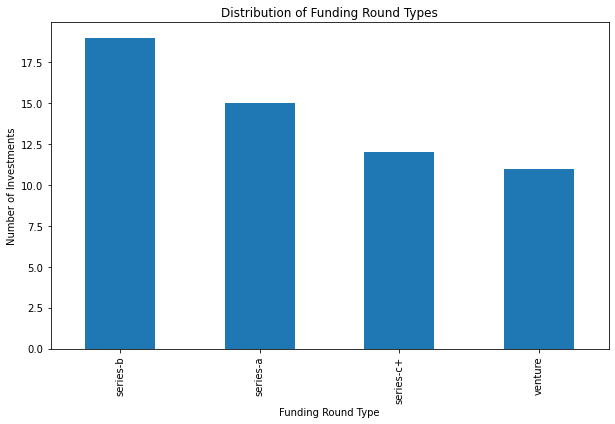

In [65]:
#plot the number of investments per funding_round_type
funding_round_counts = selected_firm_investments['funding_round_type'].value_counts()
plt.figure(figsize=(10, 6))
funding_round_counts.plot(kind='bar')
plt.title('Distribution of Funding Round Types')
plt.xlabel('Funding Round Type')
plt.ylabel('Number of Investments')
plt.show()

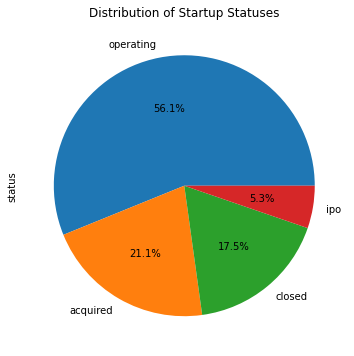

In [66]:
#Plot the different status in the investment portfilio 
startup_status_counts = selected_firm_investments['status'].value_counts()
plt.figure(figsize=(10, 6))
startup_status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Startup Statuses')
plt.show()

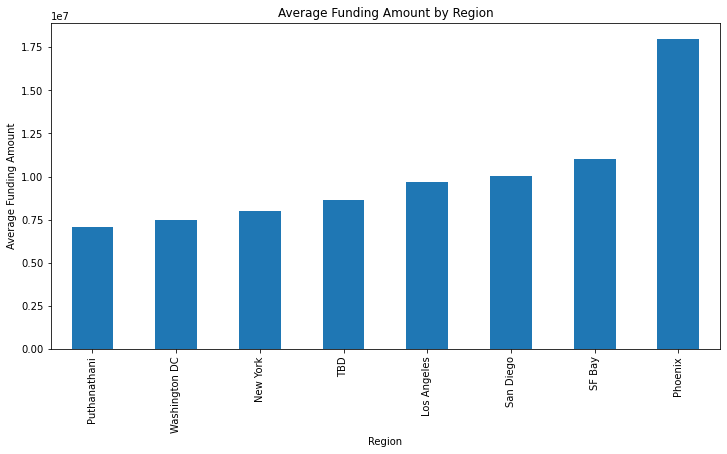

In [67]:
#Plot the average funding amount per region
region_avg_funding = selected_firm_investments.groupby('region')['raised_amount'].mean()
plt.figure(figsize=(12, 6))
region_avg_funding.sort_values().plot(kind='bar')
plt.title('Average Funding Amount by Region')
plt.xlabel('Region')
plt.ylabel('Average Funding Amount')
plt.show()

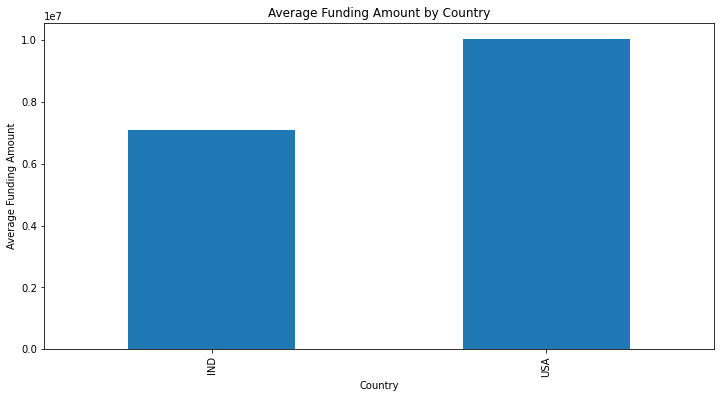

In [68]:
#Plot the average funding amount per country
country_avg_funding = selected_firm_investments.groupby('country_code')['raised_amount'].mean()
plt.figure(figsize=(12, 6))
country_avg_funding.sort_values().plot(kind='bar')
plt.title('Average Funding Amount by Country')
plt.xlabel('Country')
plt.ylabel('Average Funding Amount')
plt.show()

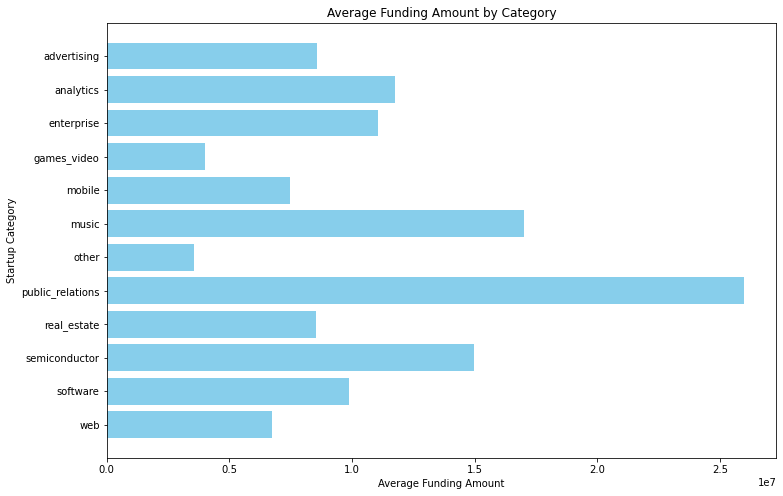

In [69]:
#Plot the average funding amount per category
categories = category_avg_funding.index
average_funding = category_avg_funding.values
plt.figure(figsize=(12, 8))
plt.barh(categories, average_funding, color='skyblue')
plt.xlabel('Average Funding Amount')
plt.ylabel('Startup Category')
plt.title('Average Funding Amount by Category')
plt.gca().invert_yaxis()  
plt.show()

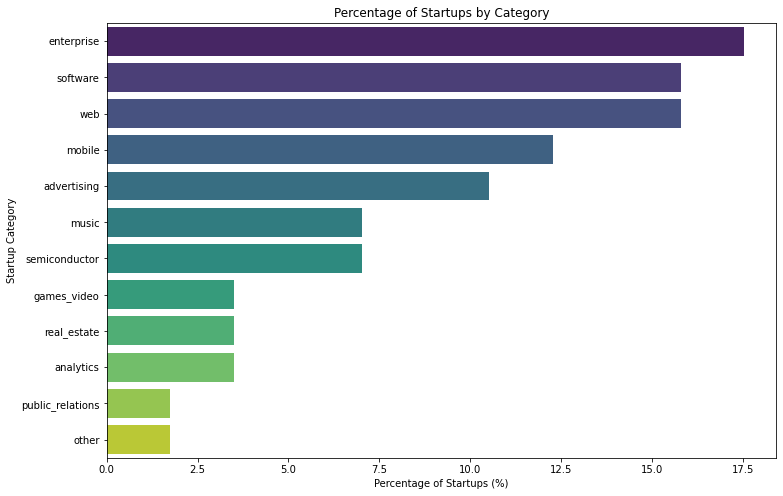

In [70]:
#Plot the percentage of startups in each category in the investments portfolio 
startup_counts_by_category = selected_firm_investments['category_code'].value_counts()
startup_percentage_by_category = (startup_counts_by_category / len(selected_firm_investments)) * 100
plt.figure(figsize=(12, 8))
sns.barplot(x=startup_percentage_by_category.values, y=startup_percentage_by_category.index, palette='viridis')
plt.xlabel('Percentage of Startups (%)')
plt.ylabel('Startup Category')
plt.title('Percentage of Startups by Category')
plt.show()


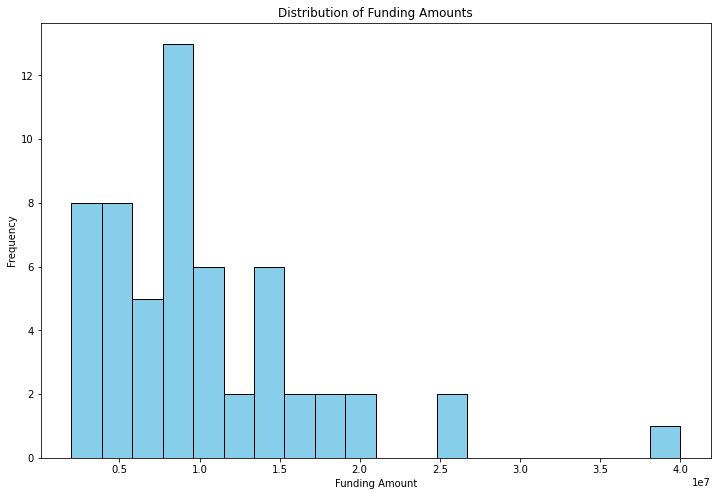

In [71]:
# Plot a histogram of funding amounts
plt.figure(figsize=(12, 8))
plt.hist(selected_firm_investments['raised_amount'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Funding Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Funding Amounts')
plt.show()

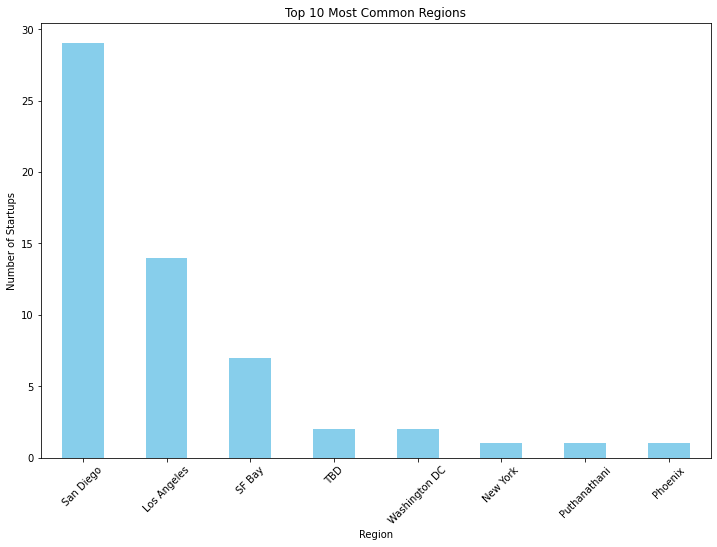

In [72]:
# Plot a bar chart for the most common regions in the portfolio
most_common_regions = selected_firm_investments['region'].value_counts()[:10]
plt.figure(figsize=(12, 8))
most_common_regions.plot(kind='bar', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Startups')
plt.title('Top 10 Most Common Regions')
plt.xticks(rotation=45)
plt.show()

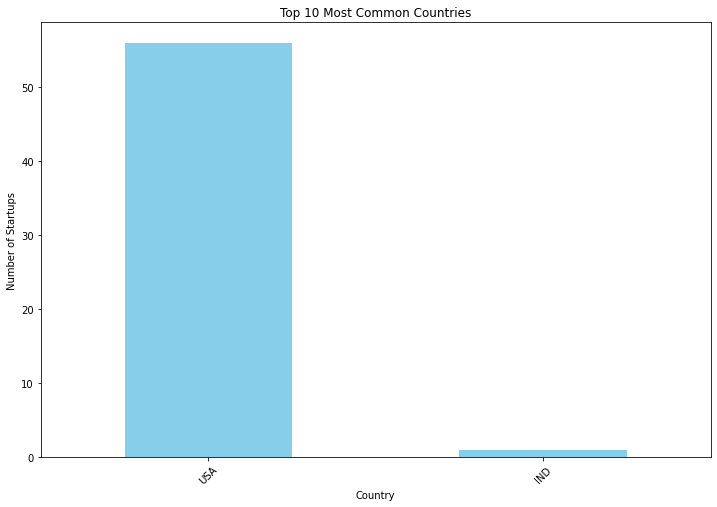

In [73]:
# Plot a bar chart for the most common countries in the portfolio
most_common_countries = selected_firm_investments['country_code'].value_counts()[:10]
plt.figure(figsize=(12, 8))
most_common_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Startups')
plt.title('Top 10 Most Common Countries')
plt.xticks(rotation=45)
plt.show()

#### 3) Collaborative Filtering:

We will use collaborative filtering to recommend startups that other investment firms similar to the selected one have invested in, but the selected investment firm hasn't.

1) Calculate Investment Firm Similarity:

- Calculate the similarity scores between the selected investment firm's portfolio and other investment firms' portfolios. We will comparw the characteristics of the startups they've invested in.

2) Find Similar Investment Firms:

- Identify the investment firms that have the highest similarity scores with the selected investment firm. These will be the investment firms that are most similar in terms of their investment patterns.

3) Recommend Startups:

- For each of the similar investment firms, identify the startups they've invested in and the investment firm in question hasn't.


In [74]:
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
#list of the common features
common_features = [
    'investment_rounds', 'invested_companies', 'milestones', 
    'relationships', 'years_invested'
]

In [76]:
# One-hot encode 'country_code' and 'region' for ml_finOrg_df
country_code_onehot = pd.get_dummies(ml_finOrg_df['country_code'], prefix='country')
region_onehot = pd.get_dummies(ml_finOrg_df['region'], prefix='region')

In [77]:
# Concatenate one-hot encoded features with ml_finOrg_df
ml_finOrg_df_encoded = pd.concat([ml_finOrg_df, country_code_onehot, region_onehot], axis=1)
ml_finOrg_df_encoded.head()

,finOrg_id,name,country_code,region,investment_rounds,invested_companies,milestones,relationships,years_invested,country_ARE,country_ARG,country_AUS,country_AUT,country_AZE,country_BEL,country_BGR,country_BHR,country_BHS,country_BMU,country_BRA,country_CAN,country_CHE,country_CHL,country_CHN,country_COL,country_CYM,country_CYP,country_CZE,country_DEU,country_DNK,country_EGY,country_ESP,country_EST,country_FIN,country_FRA,country_GBR,country_GIB,country_GRC,country_HKG,country_HRV,country_HUN,country_IDN,country_IND,country_IRL,country_ISL,country_ISR,country_ITA,country_JOR,country_JPN,country_KEN,country_KHM,country_KOR,country_KWT,country_LBN,country_LTU,country_LUX,country_LVA,country_MAR,country_MEX,country_MUS,country_MYS,country_NGA,country_NLD,country_NOR,country_NZL,country_PAK,country_PHL,country_POL,country_PRI,country_PRT,country_PST,country_QAT,country_ROM,country_RUS,country_SAU,country_SGP,country_SVK,country_SVN,country_SWE,country_THA,country_TTO,country_TUR,country_TWN,country_UKR,country_URY,country_USA,country_VEN,country_VNM,country_WSM,country_ZAF,country_unknown,region_AVEZZANO,region_Aachen,region_Aalborg,region_Aarhus,region_Aarhus N,region_Aarschot,region_Aberdeen,region_Abu Dhabi,region_Adelaide,region_Ahmedabad,region_Al Khobar,region_Albany,region_Alberta,region_Albuquerque,region_Allentown,region_Alphen aan den Rijn,region_Altamira,region_Ames,region_Amherst,region_Amman,region_Amstelveen,region_Amsterdam,region_Antwerpen,region_Arizona - Other,region_Arkansas - Other,region_Arnhem,region_Asheville,region_Aspen,region_Athens,region_Atlanta,region_Auburn,region_Auckland,region_Auckland Central,region_Austin,region_Australia - Other,region_Avignon,region_Avon,region_BILTHOVEN,region_Baar,region_Baar-Zug,region_Bad Homburg,region_Bagsvaerd,region_Bahrain - Other,region_Bakersfield,region_Baku,region_Bala Cynwyd,region_Baltimore,region_Bandar Utama,region_Bangalore,region_Bangkok,region_Barcelona,region_Barnsley,region_Basel,region_Basking Ridge,region_Batavia,region_Bath,region_Baton Rouge,region_Beijing,region_Beirut,region_Belfast,region_Belgique,region_Belgium - Other,region_Belo Horizonte,region_Bentley WA,region_Bergamo,region_Bergen,region_Berlin,region_Bern,region_Bernin,region_Bethlehem,region_Bilbao,region_Binghamton,region_Birmingham,region_Bismarck,region_Blackwater,region_Bloomington,region_Boise,region_Bologna,region_Bolton,region_Bonn,region_Bordeaux,region_Bordeaux Cedex,region_Boston,region_Boulder,region_Boulogne,region_Bratislava,region_Brazil - Other,region_Breukelen,region_Bristol,region_Brunswick,region_Brussel,region_Brussels,region_Bruxelles,region_Bucharest,region_Budapest,region_Buenos Aires,region_Buffalo,region_Burgos,region_Burlington,region_Bussum,region_CERGY PONTOISE Cedex,region_CLERMONT-FERRAND,region_CORENC,region_Caesarea,region_Cairo,region_Calcutta,region_Calgary,region_California - Other,region_Canada - Other,region_Cape,region_Cape Town,region_Cardiff,region_Carmel,region_Casablanca,region_Causeway Bay,region_Cayman Islands - Other,region_Cedar Rapids,region_Center Harbor,region_Chai Wan,region_Champagne au mont d'or,region_Champaign,region_Chandigarh,region_Chappaqua,region_Charleston,region_Charlotte,region_Charlottesville,region_Cheltenham,region_Chennai,region_Cheshire,region_Cheyenne,region_Chicago,region_Chico,region_China - Other,region_Cincinnati,region_Ciudad Autonoma de Buenos Aires,region_Cleveland,region_Clifton Park,region_Co Clare,region_Coimbra,region_Cologne,region_Colombia - Other,region_Colorado - Other,region_Colorado Springs,"region_Columbia, SC",region_Columbus,region_Copenhagen,region_Cork,region_Corning,region_Corona del Mar,region_Cos Cob,region_Coventry,region_Cranford,region_Croissy-sur-Seine,region_Cybercity,region_DNK,region_Dallas,region_Danderyd,region_Darmstadt,region_Davenport,region_Dawes Point NSW,region_Deerfield,region_Denmark,region_Denmark - Other,region_Denver,region_Des Moines,region_Detroit,region_Devon,region_Dhahran,regi

In [78]:
# Select the common features selected investment firm
selected_firm_features = ml_finOrg_df_encoded[ml_finOrg_df_encoded['finOrg_id'] == selected_firm_id][common_features + country_code_onehot.columns.tolist() + region_onehot.columns.tolist()]
selected_firm_features.head()

,investment_rounds,invested_companies,milestones,relationships,years_invested,country_ARE,country_ARG,country_AUS,country_AUT,country_AZE,country_BEL,country_BGR,country_BHR,country_BHS,country_BMU,country_BRA,country_CAN,country_CHE,country_CHL,country_CHN,country_COL,country_CYM,country_CYP,country_CZE,country_DEU,country_DNK,country_EGY,country_ESP,country_EST,country_FIN,country_FRA,country_GBR,country_GIB,country_GRC,country_HKG,country_HRV,country_HUN,country_IDN,country_IND,country_IRL,country_ISL,country_ISR,country_ITA,country_JOR,country_JPN,country_KEN,country_KHM,country_KOR,country_KWT,country_LBN,country_LTU,country_LUX,country_LVA,country_MAR,country_MEX,country_MUS,country_MYS,country_NGA,country_NLD,country_NOR,country_NZL,country_PAK,country_PHL,country_POL,country_PRI,country_PRT,country_PST,country_QAT,country_ROM,country_RUS,country_SAU,country_SGP,country_SVK,country_SVN,country_SWE,country_THA,country_TTO,country_TUR,country_TWN,country_UKR,country_URY,country_USA,country_VEN,country_VNM,country_WSM,country_ZAF,country_unknown,region_AVEZZANO,region_Aachen,region_Aalborg,region_Aarhus,region_Aarhus N,region_Aarschot,region_Aberdeen,region_Abu Dhabi,region_Adelaide,region_Ahmedabad,region_Al Khobar,region_Albany,region_Alberta,region_Albuquerque,region_Allentown,region_Alphen aan den Rijn,region_Altamira,region_Ames,region_Amherst,region_Amman,region_Amstelveen,region_Amsterdam,region_Antwerpen,region_Arizona - Other,region_Arkansas - Other,region_Arnhem,region_Asheville,region_Aspen,region_Athens,region_Atlanta,region_Auburn,region_Auckland,region_Auckland Central,region_Austin,region_Australia - Other,region_Avignon,region_Avon,region_BILTHOVEN,region_Baar,region_Baar-Zug,region_Bad Homburg,region_Bagsvaerd,region_Bahrain - Other,region_Bakersfield,region_Baku,region_Bala Cynwyd,region_Baltimore,region_Bandar Utama,region_Bangalore,region_Bangkok,region_Barcelona,region_Barnsley,region_Basel,region_Basking Ridge,region_Batavia,region_Bath,region_Baton Rouge,region_Beijing,region_Beirut,region_Belfast,region_Belgique,region_Belgium - Other,region_Belo Horizonte,region_Bentley WA,region_Bergamo,region_Bergen,region_Berlin,region_Bern,region_Bernin,region_Bethlehem,region_Bilbao,region_Binghamton,region_Birmingham,region_Bismarck,region_Blackwater,region_Bloomington,region_Boise,region_Bologna,region_Bolton,region_Bonn,region_Bordeaux,region_Bordeaux Cedex,region_Boston,region_Boulder,region_Boulogne,region_Bratislava,region_Brazil - Other,region_Breukelen,region_Bristol,region_Brunswick,region_Brussel,region_Brussels,region_Bruxelles,region_Bucharest,region_Budapest,region_Buenos Aires,region_Buffalo,region_Burgos,region_Burlington,region_Bussum,region_CERGY PONTOISE Cedex,region_CLERMONT-FERRAND,region_CORENC,region_Caesarea,region_Cairo,region_Calcutta,region_Calgary,region_California - Other,region_Canada - Other,region_Cape,region_Cape Town,region_Cardiff,region_Carmel,region_Casablanca,region_Causeway Bay,region_Cayman Islands - Other,region_Cedar Rapids,region_Center Harbor,region_Chai Wan,region_Champagne au mont d'or,region_Champaign,region_Chandigarh,region_Chappaqua,region_Charleston,region_Charlotte,region_Charlottesville,region_Cheltenham,region_Chennai,region_Cheshire,region_Cheyenne,region_Chicago,region_Chico,region_China - Other,region_Cincinnati,region_Ciudad Autonoma de Buenos Aires,region_Cleveland,region_Clifton Park,region_Co Clare,region_Coimbra,region_Cologne,region_Colombia - Other,region_Colorado - Other,region_Colorado Springs,"region_Columbia, SC",region_Columbus,region_Copenhagen,region_Cork,region_Corning,region_Corona del Mar,region_Cos Cob,region_Coventry,region_Cranford,region_Croissy-sur-Seine,region_Cybercity,region_DNK,region_Dallas,region_Danderyd,region_Darmstadt,region_Davenport,region_Dawes Point NSW,region_Deerfield,region_Denmark,region_Denmark - Other,region_Denver,region_Des Moines,region_Detroit,region_Devon,region_Dhahran,region_Diplomvej,region_Docklands,regio

In [79]:
# Group by 'finOrg_id' and calculate the mean for numerical features
grouped_features = ml_finOrg_df_encoded.groupby('finOrg_id')[common_features + country_code_onehot.columns.tolist() + region_onehot.columns.tolist()].mean()
grouped_features.head()


,investment_rounds,invested_companies,milestones,relationships,years_invested,country_ARE,country_ARG,country_AUS,country_AUT,country_AZE,country_BEL,country_BGR,country_BHR,country_BHS,country_BMU,country_BRA,country_CAN,country_CHE,country_CHL,country_CHN,country_COL,country_CYM,country_CYP,country_CZE,country_DEU,country_DNK,country_EGY,country_ESP,country_EST,country_FIN,country_FRA,country_GBR,country_GIB,country_GRC,country_HKG,country_HRV,country_HUN,country_IDN,country_IND,country_IRL,country_ISL,country_ISR,country_ITA,country_JOR,country_JPN,country_KEN,country_KHM,country_KOR,country_KWT,country_LBN,country_LTU,country_LUX,country_LVA,country_MAR,country_MEX,country_MUS,country_MYS,country_NGA,country_NLD,country_NOR,country_NZL,country_PAK,country_PHL,country_POL,country_PRI,country_PRT,country_PST,country_QAT,country_ROM,country_RUS,country_SAU,country_SGP,country_SVK,country_SVN,country_SWE,country_THA,country_TTO,country_TUR,country_TWN,country_UKR,country_URY,country_USA,country_VEN,country_VNM,country_WSM,country_ZAF,country_unknown,region_AVEZZANO,region_Aachen,region_Aalborg,region_Aarhus,region_Aarhus N,region_Aarschot,region_Aberdeen,region_Abu Dhabi,region_Adelaide,region_Ahmedabad,region_Al Khobar,region_Albany,region_Alberta,region_Albuquerque,region_Allentown,region_Alphen aan den Rijn,region_Altamira,region_Ames,region_Amherst,region_Amman,region_Amstelveen,region_Amsterdam,region_Antwerpen,region_Arizona - Other,region_Arkansas - Other,region_Arnhem,region_Asheville,region_Aspen,region_Athens,region_Atlanta,region_Auburn,region_Auckland,region_Auckland Central,region_Austin,region_Australia - Other,region_Avignon,region_Avon,region_BILTHOVEN,region_Baar,region_Baar-Zug,region_Bad Homburg,region_Bagsvaerd,region_Bahrain - Other,region_Bakersfield,region_Baku,region_Bala Cynwyd,region_Baltimore,region_Bandar Utama,region_Bangalore,region_Bangkok,region_Barcelona,region_Barnsley,region_Basel,region_Basking Ridge,region_Batavia,region_Bath,region_Baton Rouge,region_Beijing,region_Beirut,region_Belfast,region_Belgique,region_Belgium - Other,region_Belo Horizonte,region_Bentley WA,region_Bergamo,region_Bergen,region_Berlin,region_Bern,region_Bernin,region_Bethlehem,region_Bilbao,region_Binghamton,region_Birmingham,region_Bismarck,region_Blackwater,region_Bloomington,region_Boise,region_Bologna,region_Bolton,region_Bonn,region_Bordeaux,region_Bordeaux Cedex,region_Boston,region_Boulder,region_Boulogne,region_Bratislava,region_Brazil - Other,region_Breukelen,region_Bristol,region_Brunswick,region_Brussel,region_Brussels,region_Bruxelles,region_Bucharest,region_Budapest,region_Buenos Aires,region_Buffalo,region_Burgos,region_Burlington,region_Bussum,region_CERGY PONTOISE Cedex,region_CLERMONT-FERRAND,region_CORENC,region_Caesarea,region_Cairo,region_Calcutta,region_Calgary,region_California - Other,region_Canada - Other,region_Cape,region_Cape Town,region_Cardiff,region_Carmel,region_Casablanca,region_Causeway Bay,region_Cayman Islands - Other,region_Cedar Rapids,region_Center Harbor,region_Chai Wan,region_Champagne au mont d'or,region_Champaign,region_Chandigarh,region_Chappaqua,region_Charleston,region_Charlotte,region_Charlottesville,region_Cheltenham,region_Chennai,region_Cheshire,region_Cheyenne,region_Chicago,region_Chico,region_China - Other,region_Cincinnati,region_Ciudad Autonoma de Buenos Aires,region_Cleveland,region_Clifton Park,region_Co Clare,region_Coimbra,region_Cologne,region_Colombia - Other,region_Colorado - Other,region_Colorado Springs,"region_Columbia, SC",region_Columbus,region_Copenhagen,region_Cork,region_Corning,region_Corona del Mar,region_Cos Cob,region_Coventry,region_Cranford,region_Croissy-sur-Seine,region_Cybercity,region_DNK,region_Dallas,region_Danderyd,region_Darmstadt,region_Davenport,region_Dawes Point NSW,region_Deerfield,region_Denmark,region_Denmark - Other,region_Denver,region_Des Moines,region_Detroit,region_Devon,region_Dhahran,region_Diplomvej,region_Docklands,regio

In [80]:
#calculate the consine_similarity
cosine_sim = cosine_similarity(selected_firm_features.values.reshape(1, -1), grouped_features.values)
cosine_sim


array([[0.99352671, 0.70057732, 0.99662919, ..., 0.59627184, 0.59627184,
        0.67490109]])

In [81]:
#calculate the similarity_score
similar_firms = pd.DataFrame({'finOrg_id': grouped_features.index, 'similarity_score': cosine_sim[0]})
similar_firms.head()

,finOrg_id,similarity_score
0,1,0.993527
1,2,0.700577
2,3,0.996629
3,4,0.992483
4,5,0.983648


In [82]:
#sort it from high to low
similar_firms = similar_firms.sort_values(by='similarity_score', ascending=False)
similar_firms.head()

,finOrg_id,similarity_score
8,10,1.000000
273,322,0.999675
23,28,0.999377
394,510,0.999229
446,569,0.998975


In [83]:
# Recommend startups based on companies that similar investment firm invested in butthe firm in question has not
recommended_startups = []

for similar_firm_id in similar_firms['finOrg_id']:
    startups_invested_by_similar_firm = ml_investor_startup_df[ml_investor_startup_df['finOrg_id'] == similar_firm_id]['startup_id']
    recommended_startups.extend(startups_invested_by_similar_firm[~startups_invested_by_similar_firm.isin(selected_firm_investments['startup_id'])])

In [84]:
#Get a df of all the startup id's that are reccomended
recommended_startups_df = pd.DataFrame({'startup_id': recommended_startups})
recommended_startups_df = recommended_startups_df.drop_duplicates()
recommended_startups_df.head()

,startup_id
0,1188
1,1280
3,8676
4,474
5,10705


In [85]:
#merge the recommended_startups_df to ml_investor_startup_df
recommended_startups_info = recommended_startups_df.merge(ml_investor_startup_df, on='startup_id', how='left')
recommended_startups_info.head()

,startup_id,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round
0,1188,322,2006-01-01,angel,750000.0,0,1
1,1188,322,2007-09-01,series-a,1500000.0,1,0
2,1280,516,2004-12-16,series-a,7500000.0,0,1
3,1280,123,2004-12-16,series-a,7500000.0,0,1
4,1280,516,2007-10-16,series-b,5800000.0,1,0


In [86]:
#merge the recommended_startups_info to similar_firms
recommended_startups_info = recommended_startups_info.merge(similar_firms, on='finOrg_id', how='left')
recommended_startups_info.head()

,startup_id,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round,similarity_score
0,1188,322,2006-01-01,angel,750000.0,0,1,0.999675
1,1188,322,2007-09-01,series-a,1500000.0,1,0,0.999675
2,1280,516,2004-12-16,series-a,7500000.0,0,1,0.952781
3,1280,123,2004-12-16,series-a,7500000.0,0,1,0.990461
4,1280,516,2007-10-16,series-b,5800000.0,1,0,0.952781


In [87]:
#sort the similarity_score by high to low 
recommended_startups_info = recommended_startups_info.sort_values(by='similarity_score', ascending=False)

#drop null values 
recommended_startups_info.dropna()

#drop duplicates in startup_id
recommended_startups_info_cf = recommended_startups_info.drop_duplicates(subset=['startup_id'])


In [88]:
recommended_startups_info_cf.head()

,startup_id,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round,similarity_score
0,1188,322,2006-01-01,angel,750000.0,0,1,0.999675
255,276197,322,2012-01-01,venture,1496000.0,1,1,0.999675
236,67942,322,2012-07-02,series-b,10500000.0,1,0,0.999675
238,192432,322,2013-03-20,series-a,4000000.0,1,0,0.999675
241,206870,322,2013-08-06,venture,1000000.0,1,0,0.999675


#### 4) Content-Based Filtering:

We will analyze the characteristics of the startups that the selected investment firm has invested in and recommending startups that are similar in terms of those characteristics. 

1) Calculating Startup Similarity:

- Calculate the cosine similarity between the characteristics of each startup that the selected investment firm has invested in and all other startups in the dataset.

2) Ranking Similar Startups:

- Sort the startups in descending order of similarity scores to identify startups that are most similar to the selected investment firm's historical investments.

3) Filtering and Recommending Startups:

- Filter out startups that the selected investment firm has already invested 

In [89]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [90]:
# Merge ml_investor_startup_df with ml_startup_df
invested_startup_data = ml_investor_startup_df.merge(ml_startup_df, on='startup_id', how='inner')
invested_startup_data.head()

,startup_id,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round,name,category_code,status,is_closed,country_code,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,company_education_score
0,4,1,2006-12-01,series-b,8500000.0,0,0,Digg,news,acquired,0,USA,SF Bay,4,45000000.0,8,57,1,172.0
1,4,2,2006-12-01,series-b,8500000.0,0,0,Digg,news,acquired,0,USA,SF Bay,4,45000000.0,8,57,1,172.0
2,4,1,2005-10-01,series-a,2800000.0,0,1,Digg,news,acquired,0,USA,SF Bay,4,45000000.0,8,57,1,172.0
3,4,2,2005-10-01,series-a,2800000.0,0,1,Digg,news,acquired,0,USA,SF Bay,4,45000000.0,8,57,1,172.0
4,4,4850,2005-10-01,series-a,2800000.0,0,1,Digg,news,acquired,0,USA,SF Bay,4,45000000.0,8,57,1,172.0


In [91]:
#list of content_features
content_features = [
    'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
    'is_acquired', 'company_education_score'
]

In [92]:
#One-hot encode 'country_code', 'region', 'status', and 'category_code' for invested_startup_data
country_code_onehot = pd.get_dummies(invested_startup_data['country_code'], prefix='country')
region_onehot = pd.get_dummies(invested_startup_data['region'], prefix='region')
status_onehot = pd.get_dummies(invested_startup_data['status'], prefix='status')
category_code_onehot = pd.get_dummies(invested_startup_data['category_code'], prefix='category')

In [93]:
#Concatenate one-hot encoded features with invested_startup_data
invested_startup_data_encoded = pd.concat([invested_startup_data, country_code_onehot, region_onehot, status_onehot, category_code_onehot], axis=1)
invested_startup_data_encoded.head()

startup_id  finOrg_id   funded_at funding_round_type  raised_amount  \
0           4          1  2006-12-01           series-b      8500000.0   
1           4          2  2006-12-01           series-b      8500000.0   
2           4          1  2005-10-01           series-a      2800000.0   
3           4          2  2005-10-01           series-a      2800000.0   
4           4       4850  2005-10-01           series-a      2800000.0   

   is_first_round  is_last_round  name category_code    status  is_closed  \
0               0              0  Digg          news  acquired          0   
1               0              0  Digg          news  acquired          0   
2               0              1  Digg          news  acquired          0   
3               0              1  Digg          news  acquired          0   
4               0              1  Digg          news  acquired          0   

  country_code  region  funding_rounds  funding_total_usd  milestones  \
0          USA  SF Bay               4         45000000.0           8   
1          USA  SF Bay               4         45000000.0           8   
2          USA  SF Bay               4         45000000.0           8   
3          USA  SF Bay               4         45000000.0           8   
4          USA  SF Bay               4         45000000.0           8   

   relationships  is_acquired  company_education_score  country_ANT  \
0             57            1                    172.0            0   
1             57            1                    172.0            0   
2             57            1                    172.0            0   
3             57            1                    172.0            0   
4             57            1                    172.0            0   

   country_ARE  country_ARG  country_AUS  country_AUT  country_AZE  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_BEL  country_BGD  country_BGR  country_BMU  country_BRA  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_CAN  country_CHE  country_CHL  country_CHN  country_COL  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_CRI  country_CYM  country_CYP  country_CZE  country_DEU  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_DNK  country_EGY  country_ESP  country_EST  country_FIN  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_FRA  country_FST  country_GBR  country_GIB  country_GIN  \
0            0            0            0            0 

In [94]:
# Extract characteristics of startups invested by the selected investment firm
selected_firm_invested_data = invested_startup_data_encoded[invested_startup_data_encoded['finOrg_id'] == selected_firm_id]
selected_firm_invested_data.head()

startup_id  finOrg_id   funded_at funding_round_type  raised_amount  \
61           16         10  2007-06-01           series-b     40000000.0   
65           16         10  2007-06-01           series-a     13500000.0   
70           16         10  2009-01-29            venture      5000000.0   
75           16         10  2009-05-14          series-c+      9600000.0   
304          91         10  2008-06-25           series-b      8400000.0   

     is_first_round  is_last_round      name category_code     status  \
61                0              1   Slacker         music  operating   
65                0              1   Slacker         music  operating   
70                0              0   Slacker         music  operating   
75                0              0   Slacker         music  operating   
304               1              0  SodaHead           web  operating   

     is_closed country_code       region  funding_rounds  funding_total_usd  \
61           0          USA    San Diego               6         73100000.0   
65           0          USA    San Diego               6         73100000.0   
70           0          USA    San Diego               6         73100000.0   
75           0          USA    San Diego               6         73100000.0   
304          0          USA  Los Angeles               3         12650000.0   

     milestones  relationships  is_acquired  company_education_score  \
61            4             16            0                     49.0   
65            4             16            0                     49.0   
70            4             16            0                     49.0   
75            4             16            0                     49.0   
304           3              7            0                     19.0   

     country_ANT  country_ARE  country_ARG  country_AUS  country_AUT  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_AZE  country_BEL  country_BGD  country_BGR  country_BMU  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_BRA  country_CAN  country_CHE  country_CHL  country_CHN  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_COL  country_CRI  country_CYM  country_CYP  country_CZE  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_DEU  country_DNK  country_EGY  country_ESP  country_EST  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_FIN  country_FRA  count

In [95]:
# Select the content features and one-hot encoded features
selected_firm_features = selected_firm_invested_data[content_features + country_code_onehot.columns.tolist() + region_onehot.columns.tolist() + status_onehot.columns.tolist() + category_code_onehot.columns.tolist()]
selected_firm_features.head()

funding_rounds  funding_total_usd  milestones  relationships  \
61                6         73100000.0           4             16   
65                6         73100000.0           4             16   
70                6         73100000.0           4             16   
75                6         73100000.0           4             16   
304               3         12650000.0           3              7   

     is_acquired  company_education_score  country_ANT  country_ARE  \
61             0                     49.0            0            0   
65             0                     49.0            0            0   
70             0                     49.0            0            0   
75             0                     49.0            0            0   
304            0                     19.0            0            0   

     country_ARG  country_AUS  country_AUT  country_AZE  country_BEL  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_BGD  country_BGR  country_BMU  country_BRA  country_CAN  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_CHE  country_CHL  country_CHN  country_COL  country_CRI  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_CYM  country_CYP  country_CZE  country_DEU  country_DNK  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_EGY  country_ESP  country_EST  country_FIN  country_FRA  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_FST  country_GBR  country_GIB  country_GIN  country_GRC  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_GTM  country_HKG  country_HMI  country_HRV  country_HUN  \
61             0            0            0            0            0   
65             0            0            0            0            0   
70             0            0            0            0            0   
75             0            0            0            0            0   
304            0            0            0            0            0   

     country_IDN  country_IND  country_IRL  country_ISL  country_ISR  \
61             0            0            0            0     

In [96]:
# Normalize the selected firm's features using Min-Max scaling
scaler = MinMaxScaler()
selected_firm_features_scaled = scaler.fit_transform(selected_firm_features)


In [97]:
# Calculate the cosine similarity between selected firm's startups and all startups
cosine_sim_matrix = cosine_similarity(selected_firm_features_scaled, invested_startup_data_encoded[content_features + country_code_onehot.columns.tolist() + region_onehot.columns.tolist() + status_onehot.columns.tolist() + category_code_onehot.columns.tolist()])
cosine_sim_matrix

array([[0.26632881, 0.26632881, 0.26632881, ..., 0.26632768, 0.26632768,
        0.26632901],
       [0.26632881, 0.26632881, 0.26632881, ..., 0.26632768, 0.26632768,
        0.26632901],
       [0.26632881, 0.26632881, 0.26632881, ..., 0.26632768, 0.26632768,
        0.26632901],
       ...,
       [0.08242476, 0.08242476, 0.08242476, ..., 0.08242348, 0.08242348,
        0.08242484],
       [0.08242476, 0.08242476, 0.08242476, ..., 0.08242348, 0.08242348,
        0.08242484],
       [0.02646196, 0.02646196, 0.02646196, ..., 0.026462  , 0.026462  ,
        0.02646211]])

In [98]:
#create a similarity_score df
similarity_scores = pd.DataFrame({
    'startup_id': invested_startup_data_encoded['startup_id'],
    'similarity_score': cosine_sim_matrix[0]
})
similarity_scores.head()

,startup_id,similarity_score
0,4,0.266329
1,4,0.266329
2,4,0.266329
3,4,0.266329
4,4,0.266329


In [99]:
#Calculate the mean similarity score for each startup
aggregated_similarity_scores = similarity_scores.groupby('startup_id')['similarity_score'].mean().reset_index()
aggregated_similarity_scores.head()

,startup_id,similarity_score
0,1,0.266328
1,4,0.266329
2,5,0.266328
3,9,0.266328
4,12,0.266328


In [100]:
#Sort startups based on similarity score from high to low
recommended_startups = aggregated_similarity_scores.sort_values(by='similarity_score', ascending=False)
recommended_startups.head()

,startup_id,similarity_score
15041,257145,0.518541
14835,240698,0.516794
15060,258380,0.501166
12309,158254,0.501166
15206,265186,0.499299


In [101]:
#Filter out startups that the selected investment firm has already invested in
recommended_startups = recommended_startups[~recommended_startups['startup_id'].isin(selected_firm_invested_data['startup_id'])]
recommended_startups.head()

,startup_id,similarity_score
15041,257145,0.518541
14835,240698,0.516794
15060,258380,0.501166
12309,158254,0.501166
15206,265186,0.499299


In [102]:
# Merge recommended startups with startup characteristics
recommended_startups_info_cb = recommended_startups.merge(ml_startup_df, on='startup_id', how='inner')
recommended_startups_info_cb.head()

,startup_id,similarity_score,name,category_code,status,is_closed,country_code,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,company_education_score
0,257145,0.518541,Tapastreet,mobile,operating,0,IRL,Dublin,1,0.0,3,2,0,4.0
1,240698,0.516794,Freee,enterprise,operating,0,JPN,Minato,2,0.0,2,1,0,2.0
2,258380,0.501166,codebender,software,operating,0,GRC,Patras,1,0.0,2,2,0,4.0
3,158254,0.501166,Prot-On,security,operating,0,ESP,Madrid,1,0.0,2,2,0,4.0
4,265186,0.499299,Sparkle.cs,other,operating,0,GBR,unknown,3,0.0,2,2,0,4.0


#### 5) Combine Recommendations:

In [103]:
#merge the recommended_startups_info_cb with the recommended_startups_info_cf
combined_recommendations = recommended_startups_info_cb.merge(recommended_startups_info_cf, on='startup_id', how='outer')
combined_recommendations.head()

,startup_id,similarity_score_x,name,category_code,status,is_closed,country_code,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,company_education_score,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round,similarity_score_y
0,257145,0.518541,Tapastreet,mobile,operating,0.0,IRL,Dublin,1.0,0.0,3.0,2.0,0.0,4.0,1391.0,2013-09-24,angel,500000.0,1.0,1.0,0.972207
1,240698,0.516794,Freee,enterprise,operating,0.0,JPN,Minato,2.0,0.0,2.0,1.0,0.0,2.0,443.0,2013-07-21,series-a,270000000.0,1.0,0.0,0.995632
2,258380,0.501166,codebender,software,operating,0.0,GRC,Patras,1.0,0.0,2.0,2.0,0.0,4.0,10051.0,2013-09-01,angel,100000.0,1.0,1.0,0.960550
3,158254,0.501166,Prot-On,security,operating,0.0,ESP,Madrid,1.0,0.0,2.0,2.0,0.0,4.0,9153.0,2011-09-02,angel,1100000.0,1.0,1.0,0.666652
4,265186,0.499299,Sparkle.cs,other,operating,0.0,GBR,unknown,3.0,0.0,2.0,2.0,0.0,4.0,2937.0,2012-11-01,other,213000.0,0.0,1.0,0.891618


In [104]:
# Fill NaN similarity scores with 0
combined_recommendations['similarity_score_x'].fillna(0, inplace=True)
combined_recommendations['similarity_score_y'].fillna(0, inplace=True)

In [105]:
combined_recommendations.head()

,startup_id,similarity_score_x,name,category_code,status,is_closed,country_code,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,company_education_score,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round,similarity_score_y
0,257145,0.518541,Tapastreet,mobile,operating,0.0,IRL,Dublin,1.0,0.0,3.0,2.0,0.0,4.0,1391.0,2013-09-24,angel,500000.0,1.0,1.0,0.972207
1,240698,0.516794,Freee,enterprise,operating,0.0,JPN,Minato,2.0,0.0,2.0,1.0,0.0,2.0,443.0,2013-07-21,series-a,270000000.0,1.0,0.0,0.995632
2,258380,0.501166,codebender,software,operating,0.0,GRC,Patras,1.0,0.0,2.0,2.0,0.0,4.0,10051.0,2013-09-01,angel,100000.0,1.0,1.0,0.960550
3,158254,0.501166,Prot-On,security,operating,0.0,ESP,Madrid,1.0,0.0,2.0,2.0,0.0,4.0,9153.0,2011-09-02,angel,1100000.0,1.0,1.0,0.666652
4,265186,0.499299,Sparkle.cs,other,operating,0.0,GBR,unknown,3.0,0.0,2.0,2.0,0.0,4.0,2937.0,2012-11-01,other,213000.0,0.0,1.0,0.891618


Weighting is given accordingly because we value if the startup is similar to the startups the firm has already invested in more than its similarities to other investment funds.

In [122]:
# Weight for collaborative filtering recommendations
weight_cf = 0.3 
# Weight for content-based filtering recommendations
weight_cb = 0.7

# Calculate a weighted average of the similarity scores
combined_recommendations['consolidated_score'] = (weight_cb * combined_recommendations['similarity_score_x']) + (weight_cf * combined_recommendations['similarity_score_y'])
combined_recommendations.head()

,startup_id,similarity_score_x,name,category_code,status,is_closed,country_code,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,company_education_score,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round,similarity_score_y,consolidated_score
0,257145,0.518541,Tapastreet,mobile,operating,0.0,IRL,Dublin,1.0,0.0,3.0,2.0,0.0,4.0,1391.0,2013-09-24,angel,500000.0,1.0,1.0,0.972207,0.654641
1,240698,0.516794,Freee,enterprise,operating,0.0,JPN,Minato,2.0,0.0,2.0,1.0,0.0,2.0,443.0,2013-07-21,series-a,270000000.0,1.0,0.0,0.995632,0.660446
2,258380,0.501166,codebender,software,operating,0.0,GRC,Patras,1.0,0.0,2.0,2.0,0.0,4.0,10051.0,2013-09-01,angel,100000.0,1.0,1.0,0.960550,0.638981
3,158254,0.501166,Prot-On,security,operating,0.0,ESP,Madrid,1.0,0.0,2.0,2.0,0.0,4.0,9153.0,2011-09-02,angel,1100000.0,1.0,1.0,0.666652,0.550812
4,265186,0.499299,Sparkle.cs,other,operating,0.0,GBR,unknown,3.0,0.0,2.0,2.0,0.0,4.0,2937.0,2012-11-01,other,213000.0,0.0,1.0,0.891618,0.616994


In [118]:
# Sort startups based on the consolidated recommendation score from high to low
final_recommendations = combined_recommendations.sort_values(by='consolidated_score', ascending=False)
final_recommendations.head()

,startup_id,similarity_score_x,name,category_code,status,is_closed,country_code,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,company_education_score,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round,similarity_score_y,consolidated_score
1,240698,0.516794,Freee,enterprise,operating,0.0,JPN,Minato,2.0,0.0,2.0,1.0,0.0,2.0,443.0,2013-07-21,series-a,270000000.0,1.0,0.0,0.995632,0.660446
0,257145,0.518541,Tapastreet,mobile,operating,0.0,IRL,Dublin,1.0,0.0,3.0,2.0,0.0,4.0,1391.0,2013-09-24,angel,500000.0,1.0,1.0,0.972207,0.654641
2,258380,0.501166,codebender,software,operating,0.0,GRC,Patras,1.0,0.0,2.0,2.0,0.0,4.0,10051.0,2013-09-01,angel,100000.0,1.0,1.0,0.960550,0.638981
6,284123,0.493558,Evercam,software,operating,0.0,IRL,Dublin,1.0,0.0,1.0,1.0,0.0,2.0,1391.0,2013-02-28,angel,500000.0,1.0,1.0,0.972207,0.637153
8,237824,0.472272,CrowdMedia,news,operating,0.0,CAN,Montreal,2.0,0.0,1.0,2.0,0.0,4.0,70.0,2013-07-01,angel,150000.0,1.0,0.0,0.986149,0.626435


In [119]:
# Filter out startups that the selected investment firm has already invested in
final_recommendations = final_recommendations[~final_recommendations['startup_id'].isin(selected_firm_invested_data['startup_id'])]
final_recommendations.head()


,startup_id,similarity_score_x,name,category_code,status,is_closed,country_code,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,company_education_score,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round,similarity_score_y,consolidated_score
1,240698,0.516794,Freee,enterprise,operating,0.0,JPN,Minato,2.0,0.0,2.0,1.0,0.0,2.0,443.0,2013-07-21,series-a,270000000.0,1.0,0.0,0.995632,0.660446
0,257145,0.518541,Tapastreet,mobile,operating,0.0,IRL,Dublin,1.0,0.0,3.0,2.0,0.0,4.0,1391.0,2013-09-24,angel,500000.0,1.0,1.0,0.972207,0.654641
2,258380,0.501166,codebender,software,operating,0.0,GRC,Patras,1.0,0.0,2.0,2.0,0.0,4.0,10051.0,2013-09-01,angel,100000.0,1.0,1.0,0.960550,0.638981
6,284123,0.493558,Evercam,software,operating,0.0,IRL,Dublin,1.0,0.0,1.0,1.0,0.0,2.0,1391.0,2013-02-28,angel,500000.0,1.0,1.0,0.972207,0.637153
8,237824,0.472272,CrowdMedia,news,operating,0.0,CAN,Montreal,2.0,0.0,1.0,2.0,0.0,4.0,70.0,2013-07-01,angel,150000.0,1.0,0.0,0.986149,0.626435


In [120]:
# Select top 10 consolidated_score
top_10_recommendations = final_recommendations.head(10)
top_10_recommendations

,startup_id,similarity_score_x,name,category_code,status,is_closed,country_code,region,funding_rounds,funding_total_usd,milestones,relationships,is_acquired,company_education_score,finOrg_id,funded_at,funding_round_type,raised_amount,is_first_round,is_last_round,similarity_score_y,consolidated_score
1,240698,0.516794,Freee,enterprise,operating,0.0,JPN,Minato,2.0,0.0,2.0,1.0,0.0,2.0,443.0,2013-07-21,series-a,270000000.0,1.0,0.0,0.995632,0.660446
0,257145,0.518541,Tapastreet,mobile,operating,0.0,IRL,Dublin,1.0,0.0,3.0,2.0,0.0,4.0,1391.0,2013-09-24,angel,500000.0,1.0,1.0,0.972207,0.654641
2,258380,0.501166,codebender,software,operating,0.0,GRC,Patras,1.0,0.0,2.0,2.0,0.0,4.0,10051.0,2013-09-01,angel,100000.0,1.0,1.0,0.960550,0.638981
6,284123,0.493558,Evercam,software,operating,0.0,IRL,Dublin,1.0,0.0,1.0,1.0,0.0,2.0,1391.0,2013-02-28,angel,500000.0,1.0,1.0,0.972207,0.637153
8,237824,0.472272,CrowdMedia,news,operating,0.0,CAN,Montreal,2.0,0.0,1.0,2.0,0.0,4.0,70.0,2013-07-01,angel,150000.0,1.0,0.0,0.986149,0.626435
11,275373,0.465606,wripl,enterprise,operating,0.0,IRL,Dublin,1.0,0.0,1.0,2.0,0.0,4.0,1391.0,2013-01-01,other,200000.0,1.0,1.0,0.972207,0.617587
4,265186,0.499299,Sparkle.cs,other,operating,0.0,GBR,unknown,3.0,0.0,2.0,2.0,0.0,4.0,2937.0,2012-11-01,other,213000.0,0.0,1.0,0.891618,0.616994
7,236218,0.493558,StudyTube,education,operating,0.0,NLD,Amsterdam,1.0,0.0,1.0,1.0,0.0,2.0,1166.0,2013-02-02,angel,500000.0,1.0,1.0,0.902632,0.616280
17,257103,0.453142,Instant Opinion,enterprise,operating,0.0,IRL,Kilkenny,3.0,0.0,1.0,1.0,0.0,2.0,1391.0,2013-01-05,angel,50000.0,1.0,0.0,0.972207,0.608862
15,283910,0.465606,LIVELENZ,software,operating,0.0,CAN,Bedford,1.0,0.0,1.0,2.0,0.0,4.0,809.0,2012-01-01,angel,1000000.0,1.0,1.0,0.935398,0.606544


#### Display the final result:

In [121]:
# Display investment firm's information
print("Name:", selected_firm_info['name'])
print("id:", selected_firm_info['finOrg_id'])
print("\nTop 10 Recommended Startups to Invest In:")
top_10_recommendations[['startup_id', 'name', 'country_code', 'region', 'category_code']]

Name: Mission Ventures
id: 10

Top 10 Recommended Startups to Invest In:


,startup_id,name,country_code,region,category_code
1,240698,Freee,JPN,Minato,enterprise
0,257145,Tapastreet,IRL,Dublin,mobile
2,258380,codebender,GRC,Patras,software
6,284123,Evercam,IRL,Dublin,software
8,237824,CrowdMedia,CAN,Montreal,news
11,275373,wripl,IRL,Dublin,enterprise
4,265186,Sparkle.cs,GBR,unknown,other
7,236218,StudyTube,NLD,Amsterdam,education
17,257103,Instant Opinion,IRL,Kilkenny,enterprise
15,283910,LIVELENZ,CAN,Bedford,software
